# Project 2

# Ames Housing project  
----

# Problem Statement 
------
Being a Real Estate agent can be tough sometime as we have to help customers to list their home when they want to sell it. In order to give good recommendations and price estimate of homes, it is important to know what could potentially influence home prices. Which features appear to add the most value to a home or what are things that homeowners could improve in their homes to increase the value? Utilizing our data sets from housing sales prices from 2007 to 2010 in Ames, Iowa, this problem is being explored using Linear Regression model. With this approach, we are trying to find relationship between sales price and other features. A successful model would predict sales prices with the least amount of error. We can use the data sets from 2007 to 2010 to test our model for evaluation and make recommendations accordingly. 


## Executive Statement
-----
Using the data from homes in Ames, Iowa, that was sold from 2007 and 2010, we created a model, that can predict sales prices depending on home features. The data sets included approximately 80 features in various data types. The first step was to explore and to clean the data. After cleaning the data and using visualization, outliers were identified and feature engineering of columns were applied. By eliminating outliers and creating new variables such as dummies to represent categorical features of the homes, we are ensuring that all features of the data will be represented during modeling process. Three models were obtained using the cleaned data such as Linear, Ridge and Lasso regression. The models were evaluated using different metrics and conclusions and recommendations were successfully obtained to answer our problem statement. A presentation was created and presented in the monthly meeting.

## Table of content
---

[1. Exploratory Analysis](#1.-Exploratory-Analysis)
- [Summary of findings](#Summary-of-findings)

[2. Data Cleaning](#2.-Data-Cleaning)
- [Index column](#Index-column)
- [Dropping PID column](#Dropping-PID-column)
- [Date sold column](#Date-sold-column)
- [Changing NaN's](#Changing-NaN's)
- [Ranking Ordinal columns](#Ranking-Ordinal-columns)
- [Outlier](#Outliers)
- [Imputing 0's](#Imputing-0's)

[3. Visualization](#3.-Visualization)
- [Summary of Visualization](#Summary-of-Visualization)
- [Summary of Statistics](#Summary-of-Statistics)

[4. Feature Engineering](#4.-Feature-Engineering)
- [New columns](#New-columns)
- [One-hot Encoding](#One-hot-Encoding)

[5. Modeling](#5.-Modeling)
- [Linear Regression](#Linear-Regression)
- [Ridge Regression](#Ridge-Regression)
- [Lasso Regression](#Lasso-Regression)

[6. Conclusion and Recommendations](#6.-Conclusion-and-Recommendations)

### Data Dictionary 
---
This is the link for the data dictionary: 
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

##  1. Exploratory Analysis

### Import packages
---

In [127]:
import numpy as np
import pandas as pd

from sklearn.linear_model     import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection  import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing    import StandardScaler, PolynomialFeatures
from sklearn.metrics          import mean_squared_error, r2_score
from sklearn.neighbors        import KNeighborsClassifier
 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
    
%matplotlib inline

### Read in Raw Data
---

- Training set 

In [128]:
df_train = pd.read_csv("../data/train.csv")

- Testing set

In [129]:
df_test =pd.read_csv("../data/test.csv")

###  High Level checks

According to the data dictionary, there are 81 columns with:

- 23 nominal variables
- 23 ordinal variables
- 14 discrete variables
- 21 continuous variables
---

**Checking rows and columns for training data**

In [130]:
df_train.shape

(2051, 81)

**Checking rows and columns for testing data**

In [131]:
df_test.shape

(879, 80)

**Note: There is one column in the training data that is not in the testing data**

- Using the code below the missing column was identified to be "SalePrice", which makes sense as the training set is going to be used to predict the Sales Price in the testing data later on.

In [132]:
[column for column in df_train.columns if column not in df_test.columns]

['SalePrice']

**Looking into the first 5 rows in both Data sets**

In [133]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [134]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


**Checking for different data types with `df_train.info()` and `df_test.info()`**
> Note: the code is not being shown as the output is long

**Checking NaN's in all of the columns**

In [135]:
print(df_train.columns[df_train.isna().any()])

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')


In [136]:
print(df_test.columns[df_test.isna().any()])

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')


**Checking Ordinal categorial columns**

In [137]:
df_train.groupby(by ="Lot Shape").count()[["SalePrice"]]

,SalePrice
Lot Shape,
IR1,692
IR2,55
IR3,9
Reg,1295


In [138]:
df_train.groupby(by ="Utilities").count()[["SalePrice"]]

,SalePrice
Utilities,
AllPub,2049
NoSeWa,1
NoSewr,1


In [139]:
df_train.groupby(by ="Land Slope").count()[["SalePrice"]]

,SalePrice
Land Slope,
Gtl,1953
Mod,88
Sev,10


**Checking nominal categorial columns**

In [140]:
df_train.groupby(by ="MS SubClass").count()[["SalePrice"]].head()

,SalePrice
MS SubClass,
20,770
30,101
40,4
45,11
50,198


In [141]:
df_train.groupby(by ="MS Zoning").count()[["SalePrice"]].head()

,SalePrice
MS Zoning,
A (agr),2
C (all),19
FV,101
I (all),1
RH,14


### Reviewing Missing NaNs  
---
From previous output : `df_train.columns[df_train.isna().any()]`

- Training

In [142]:
df_train[['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']].isnull().sum()

Lot Frontage      330
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Cars         1
Garage Area         1
dtype: int64

- Testing

In [143]:
df_test[['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']].isnull().sum()

Lot Frontage      160
Mas Vnr Area        1
BsmtFin SF 1        0
BsmtFin SF 2        0
Bsmt Unf SF         0
Total Bsmt SF       0
Bsmt Full Bath      0
Bsmt Half Bath      0
Garage Yr Blt      45
Garage Cars         0
Garage Area         0
dtype: int64

**Evaluated columns `"Mas Vnr Type"` and `"Mas Vnr Area"`**

- Training

In [144]:
df_train[df_train["Mas Vnr Type"] == "None"][["Mas Vnr Area", "Mas Vnr Type"]].head(2)

,Mas Vnr Area,Mas Vnr Type
2,0.0,None
3,0.0,None


In [145]:
df_train[df_train["Mas Vnr Area"].isnull() ][["Mas Vnr Area", "Mas Vnr Type"]].head(2)

,Mas Vnr Area,Mas Vnr Type
22,NaN,NaN
41,NaN,NaN


- Testing

In [146]:
df_test[df_test["Mas Vnr Type"] == "None"][["Mas Vnr Area", "Mas Vnr Type"]].head(2)

,Mas Vnr Area,Mas Vnr Type
0,0.0,None
1,0.0,None


In [147]:
df_test[df_test["Mas Vnr Area"].isnull() ][["Mas Vnr Area", "Mas Vnr Type"]]

,Mas Vnr Area,Mas Vnr Type
866,NaN,NaN


**Example of missing values in columns where feature nan is represented as NaN's**

- Training

In [148]:
df_train["Bsmt Qual"].unique()

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [149]:
df_train["Bsmt Qual"].isnull().sum()

55

- Testing

In [150]:
df_test["Bsmt Qual"].unique()

array(['Fa', 'Gd', 'TA', 'Ex', nan, 'Po'], dtype=object)

In [151]:
df_test["Bsmt Qual"].isnull().sum()

25

**Find Non-numeric columns**
- These columns are ordinal and nominal variables

In [152]:
non_numeric_cols = [c for c in df_train.columns if np.isreal(c) == False]
non_numeric_cols = [c for c in df_test.columns if np.isreal(c) == False]

- Using function to find missed represented columns where `NaN` supposed to be `'NA'` in both ordinal and nominal variable

> Function takes in a list of columns and iterates through each non-numeric columns's value. If it find a `NaN`, this column is being appended to a new list. It's important to input a non-numeric column as the function compares data type of floats (NaN) and string (object) values.

In [153]:
def find_nan(df, columns):
    nan_cols = []
    for columns in df[columns]:                 #iterating through columns
        for items in df[columns].unique():      #iterating through each value in column
            if type(items) == float:            #finding NaN's as float data type
                nan_cols.append(columns)
            else: 
                continue
    return nan_cols

In [154]:
train_nan_cols = find_nan(df_train,non_numeric_cols)
test_nan_cols = find_nan(df_test,non_numeric_cols)
print(f"Training CF: {train_nan_cols}")
print("----")
print(f"Testing  CD: {test_nan_cols}")

Training CF: ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']
----
Testing  CD: ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


### Summary of findings
---

1. As shown by the output of `df.head()`, the column "ID" should be the index column as it will be easier to interpret and represent the data (This applies for both of the data sets)


2. The data type of each column was shown by the output of `df.info()` and according to the data dictionary there are 23 ordinal variables. It makes sense to change these variables into numerical variables because these variables have a clear order assigned to them.


3. Column `"Lot Frontage"` and `"Garage Yr Blt"` is missing a lot of values. All other colums are missing only a few rows
---

Output of this code:
`df_train[df_train["Mas Vnr Type"] == "None"][["Mas Vnr Area", "Mas Vnr Type"]]` showed that, for `"Mas Vnr Type"`, where the feature is "None", the value represents 0 in `"Mas Vnr Area"`. Column `"Mas Vnr Area"` had many NaNs, however they should actually be 0's instead. 

----

Columns, where `NaN` should actually be `"NA"` feature in both data set (unless indicated):
- `"Mas Vnr Type"`    
- `"Bsmt Qual"`       
- `"Bsmt Cond"` 
- `"Bsmt Exposure"` 
- `"BsmtFin Type 1"` 
- `"BsmtFin Type 2"`
- `"Fireplace Qu"`
- `"Garage Type"`
- `"Garage Finish"`
- `"Garage Qual"`
- `"Garage Cond"`
- `"Pool QC"`
- `"Misc Feature"`
- `"Fence"`
- `"Electrical"` (only in testing data)

# 2. Data Cleaning

### Index column
---

Resetting index of data frame accorcing to one of the columns (`"Id"`) in both data sets

In [155]:
df_train.set_index("Id", inplace= True)
df_test.set_index("Id", inplace= True)

### Dropping PID column
---

Dropping `PID` (Parcel identification number) as it does not make sense to keep it on our data

In [156]:
df_train.drop(columns= "PID", inplace=True)
df_test.drop(columns= "PID", inplace=True)

### Date sold column
---


Creating a new column `"Date Sold"` with merging `"Yr Sold"` and `"Mo Sold"`

In [157]:
df_train['date_sold'] = pd.to_datetime(df_train["Yr Sold"].astype(str) + '-' + df_train["Mo Sold"].astype(str))
df_test['date_sold'] = pd.to_datetime(df_test["Yr Sold"].astype(str) + '-' + df_test["Mo Sold"].astype(str))

### Changing NaN's

---
All columns, where `NaN's` are actually `"NA"` feature, are going to be changed accordingly.

Changing NaN's to "NA" by using a function 
>`test_nan_cols` and `train_nan_cols` output includes all columns with NaN's 

In [158]:
#Function that converts NaN's into categorial None (NA)
def convert_na (df, columns):
    for c in df[columns]:
        df[c].fillna("NA", inplace=True)
    return 

- Training dataset

In [159]:
convert_na(df_train, columns= test_nan_cols)

- Test dataset 

In [160]:
convert_na(df_test, columns= train_nan_cols)

### Ranking Ordinal columns
---

Creating a dictionary where columns with ordered features are being assigned with rankings

In [161]:
dict_ord = { 'Lot Shape': {'IR1': 3,'IR2': 2, 'IR3': 1,'Reg': 4},
             'Utilities': {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub':4},
             'Land Slope': {'Sev': 1, 'Mod': 2, 'Gtl': 3},
             'Exter Qual': {'Po': 1 , 'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5},
             'Exter Cond': {'Po': 1 , 'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5},
             'Bsmt Qual': {'NA': 1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6},
             'Bsmt Cond': {'NA': 1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6},
             'Bsmt Exposure': {'NA': 1, 'No': 2, 'Mn': 3, 'Av':4, 'Gd':5 },
             'BsmtFin Type 1': {'NA':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ': 7},
             'BsmtFin Type 2': {'NA':1, 'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ': 7},
             'Heating QC': {'Po': 1 , 'Fa': 2, 'TA': 3, 'Gd':4, 'Ex':5},
             'Electrical': { 'NA':1, 'Mix':2, 'FuseP': 3, 'FuseF':4, 'FuseA':5, 'SBrkr':6},
             'Kitchen Qual': {'Po': 0 , 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4},
             'Functional': {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1': 6, 'Typ':7},
             'Fireplace Qu': {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
             'Garage Finish': {'NA': 0, 'Unf':1, 'RFn':2, 'Fin':3},
             'Garage Qual': {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
             'Garage Cond': {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
             'Paved Drive': {'N':0, 'P':1, 'Y': 2},
             'Pool QC': {'NA': 0,'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
             'Fence': {'NA': 0 , 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}  }

**Replacing ordinal features with rankings assigned in the dictionary**

In [162]:
df_train.replace(dict_ord, inplace= True)
df_test.replace(dict_ord,inplace= True)

**Converting all ordinal features to numeric columns**

Getting a list of columns where ranking was assigned

In [163]:
numeric_cols = list(dict_ord.keys())

Converting ranking columns to numerci columns with `apply.(pd.to_numeric)`

In [164]:
df_train[numeric_cols] = df_train[numeric_cols].apply(pd.to_numeric)
df_test[numeric_cols] = df_test[numeric_cols].apply(pd.to_numeric)

### Outliers

----
Visualized the outliers by plotting a scatter plot

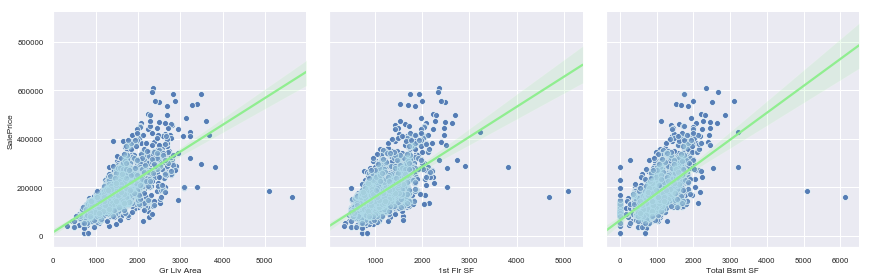

In [165]:
g = sns.pairplot(df_train, 
                 x_vars=["Gr Liv Area","1st Flr SF",'Total Bsmt SF'], 
                 y_vars=["SalePrice"],
                 height = 4)
g.map(sns.regplot, scatter_kws={"color": "lightblue",'alpha':0.1}, line_kws={"color": "lightgreen"})

#### Outliers between Sales Price and Ground living area.

In [166]:
df_train.sort_values(by="Gr Liv Area", ascending=False)[["Gr Liv Area", "SalePrice"]].head(2)

,Gr Liv Area,SalePrice
Id,,
1499,5642,160000
2181,5095,183850


For `ID` 1499 and 2181, the living room square feet is ~ 5000 sq. feet, however the price is less than the other listings, where the size of the living room is significant lower (~3900 sq. feet). This is also clearly visible in the plot above (1st plot: "Ground Living Area vs. Sales Price")

We are going to drop these two rows from our data as they are significant outliers.

Making a new dataframe where it only includes square feet less than 4000 in `"Gr Liv Area"`

In [167]:
df_train = df_train[df_train["Gr Liv Area"] <= 4000]

#### Outliers between Sales Price and 1st Floor square feett
---

In [168]:
df_train.sort_values(by="1st Flr SF", ascending=False)[["1st Flr SF", "SalePrice"]].head(3)

,1st Flr SF,SalePrice
Id,,
1498,3820,284700
1773,3228,430000
1573,2898,287000


We are going to drop the first two rows, where the square footage is more than 3000 sq. ft and the Sales price for the first one is very low and the second one is very high. This is also clearly visible on the scatterplot (2nd plot: "1st Floor SF vs Sales Price")

In [169]:
df_train = df_train[df_train["1st Flr SF"] <= 3000]

#### Outliers between Sales Price and Total basement square feet
---

In [170]:
df_train.sort_values(by='Total Bsmt SF', ascending=False)[['Total Bsmt SF', "SalePrice"]].head(3)

,Total Bsmt SF,SalePrice
Id,,
445,3206.0,284000
424,3094.0,555000
47,2846.0,500000


Like 1st Floor square feet we are going to drop the total basement square footage higher than 3000 sq. ft, as the price corresponding to these values are outliers(as shown in the plot: "Total Basement SF vs Sales Price")

In [171]:
df_train = df_train[df_train['Total Bsmt SF'] <= 3000]

### Imputing 0's
---

- For `"Lot Frontage"`, the value is zero as NaN indicates that the property is not connected to the street. 
- For `"Garage Yr Blt"`, NaN's indicates that it does have a Garage
- For `'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area'` indicates that it does not have a bathroom in the basement or no garage to park a car inside. 
- For `"Mas Vnr Area"`, the correct input = 0 as indicated by the value of "None" in `"Mas Vnr Type"` 

Checking which columns are missing data

In [172]:
print(df_train.columns[df_train.isna().any()].tolist())

['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']


In [173]:
print(df_test.columns[df_test.isna().any()].tolist())

['Lot Frontage', 'Mas Vnr Area', 'Electrical', 'Garage Yr Blt']


**Because NaN's are missing these columns we can impute 0's throughout the entire dataframe**

Fill in NaNs

In [174]:
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# 3. Visualization

### Correlation between Sales Price and other features
----

Using `df_train.corr()` and list comprehension, the first list includes columns that have a higher than 0.6 correlation with Sales price. The second list shows the columns that has a negative relation with Sales price

In [175]:
sales_cor_high = ([df_train.corr()["SalePrice"].index[index] for index, value in enumerate(df_train.corr()["SalePrice"]) if value >= 0.6 if value != 1])
print(sales_cor_high)

['Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Kitchen Qual', 'Garage Cars', 'Garage Area']


In [176]:
sales_cor_low = [df_train.corr()["SalePrice"].index[index] for index, value in enumerate(df_train.corr()["SalePrice"]) if value <= - 0.2]
print(sales_cor_low)

['Lot Shape']


#### Heatmap
As shown in the graph below there are strong positive correlation between salesprice and overall quality, ground living area square feet, garage area, garage cars, total of basement sqaure feet, 1st floor sqaure feet and a slightly negative correlation with parcel identification number and Lot Shape. 

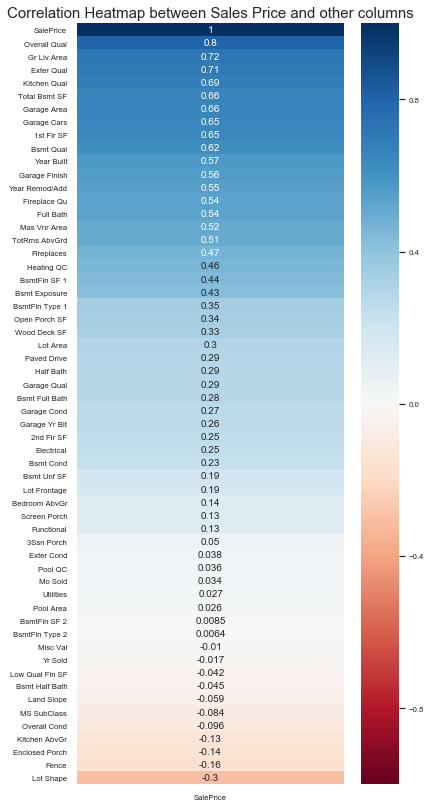

In [177]:
plt.figure(figsize=(6,14))
plt.title("Correlation Heatmap between Sales Price and other columns", fontsize=15)

sns.heatmap(df_train.corr()[["SalePrice"]].sort_values(by="SalePrice", ascending=False),
            annot=True,
            cmap="RdBu",
            vmax=1,
            vmin=-1);

#### Scatterplot

Like the heatmap the positive correlation between Sales Price and overall quality, ground living area square feet, garage area, garage cars, total of basement sqaure feet, 1st floor sqaure feet is shown in the scatterplots below. All plots show linearity to Sales Price and points are distributed along the line.

In [178]:
#Function to plot Scatterplots as subplots
def subplot_scatter(df, list_of_columns_x, y_col, list_of_titles, list_of_xlabels): 
    nrows = int(np.ceil(len(list_of_columns_x)/2))                    # Makes sure to have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10, 15))    #Specified figsize, columns and rows
    ax = ax.ravel()                                                   # Ravel turns a matrix into a vector, which is easier to iterate

    for i, column in enumerate(list_of_columns_x):                    #Gives us an index and columns 
        sns.regplot(x= column, y= y_col,data= df, ax= ax[i],)         #Plotting scatterplots
        ax[i].set_title(list_of_titles[i], fontsize = 15)             #Set titles
        ax[i].set_xlabel(list_of_xlabels[i],fontsize = 12)            #Set xlabels
    
    if len(list_of_columns_x) % 2 == 1:                               #Turn off odd number of subplots
        ax[-1].axis('off')
    
    sns.set(font_scale=0.7)                                           #Set scale for plots
    plt.tight_layout()                                                #Move the plots so they don't overlap 

Using list comprehension to make a list of titles

In [179]:
sales_cor_high_title = [c + " vs Sales price" for c in sales_cor_high]

Using the function to plot scatter plots
- `sales_cor_high` variable has all the columns for the x-axis
- `sales_cor_high_title` variable has all the title columns
- `SalePrice` is the same for all the y-axis

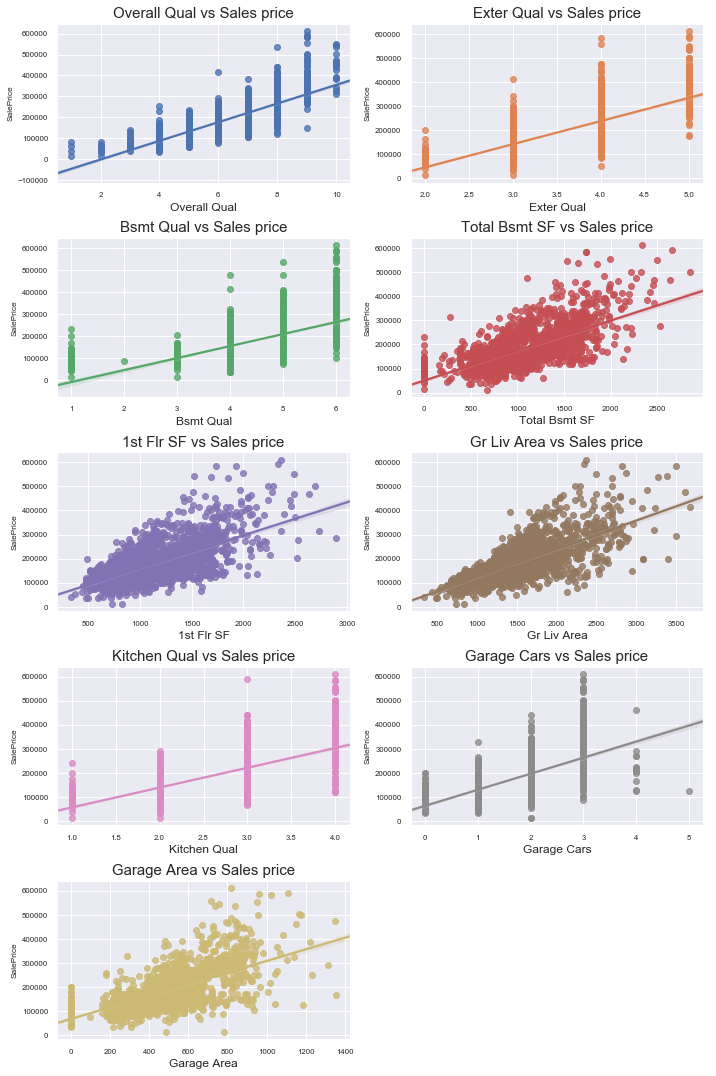

In [180]:
subplot_scatter(df_train,                 #data
                sales_cor_high,           #x-axis
                "SalePrice",              #y-axis
                sales_cor_high_title,     #title
                sales_cor_high)           #list label of x-axis 

In the scatterplots above we can see that correlation between Sales Price and different features of the house. It seems that sales Price has a high correlation with Size of the house such as total basement, 1st floor and ground living room area, garage area. The overall Quality of the house also seem to play a big role in determining Sale Price as it has the highest correlation of 0.8. 

#### Scatterplot of Age of the house

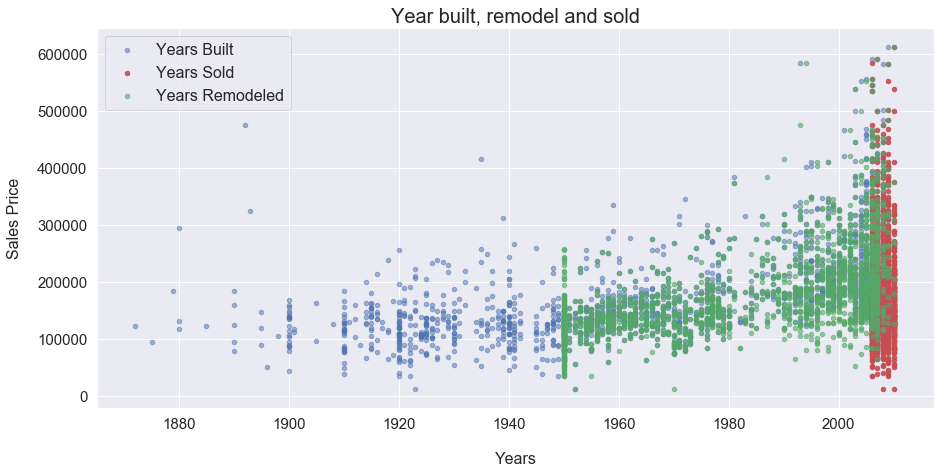

In [181]:
ax1 = df_train.plot(kind='scatter', y= "SalePrice", x= "Year Built", color='b', alpha = 0.5, label= "Years Built", figsize= (15,7), legend=True)    
ax2 = df_train.plot(kind='scatter', y= "SalePrice", x= "Yr Sold", color='r', ax=ax1, alpha = 0.9, label= "Years Sold")    
ax3 = df_train.plot(kind='scatter', y= "SalePrice", x= "Year Remod/Add", color='g', ax=ax1, alpha = 0.6, label= "Years Remodeled");
plt.title("Year built, remodel and sold", fontsize = 20)
plt.xlabel("Years", fontsize=16, labelpad=20)
plt.ylabel("Sales Price", fontsize=16, labelpad=15)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
plt.legend(fontsize=16)

In this plot we can see the year when the house was built(blue), remodeled (remodeled) and sold (red). There is overlap between when the house was sold and remodeled indicating that houses were remodeled before they were sold.

#### Bar charts

By plotting barchart categorial feature of columns can be represented with Sales Price. 

In [182]:
#Function to plot bar charts as subplots
def subplot_bars(df, list_of_columns_y, x_col, list_of_titles,list_of_ylabels): 
    nrows = int(np.ceil(len(list_of_columns_y)/2))                    # Makes sure to have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,14))     # Specified figsize, columns and rows
    ax = ax.ravel()                                                   # Ravel turns a matrix into a vector, which is easier to iterate

    for i, column in enumerate(list_of_columns_y):                    #Gives us an index and columns 
        sns.barplot(x= x_col, y= column, data= df, ax= ax[i])         #Plotting scatterplots
        ax[i].set_title(list_of_titles[i], fontsize = 16)             #Set titles
        ax[i].set_ylabel(list_of_ylabels[i],fontsize = 12)            #Set ylabels   
        
    if len(list_of_columns_y) % 2 == 1:                               #Turn off odd number of subplots
        ax[-1].axis('off')
    
    sns.set(font_scale=0.7)                                           #Set scale for plots
    plt.tight_layout()                                                #Move the plots so they don't overlap 

Plotting Bar Charts

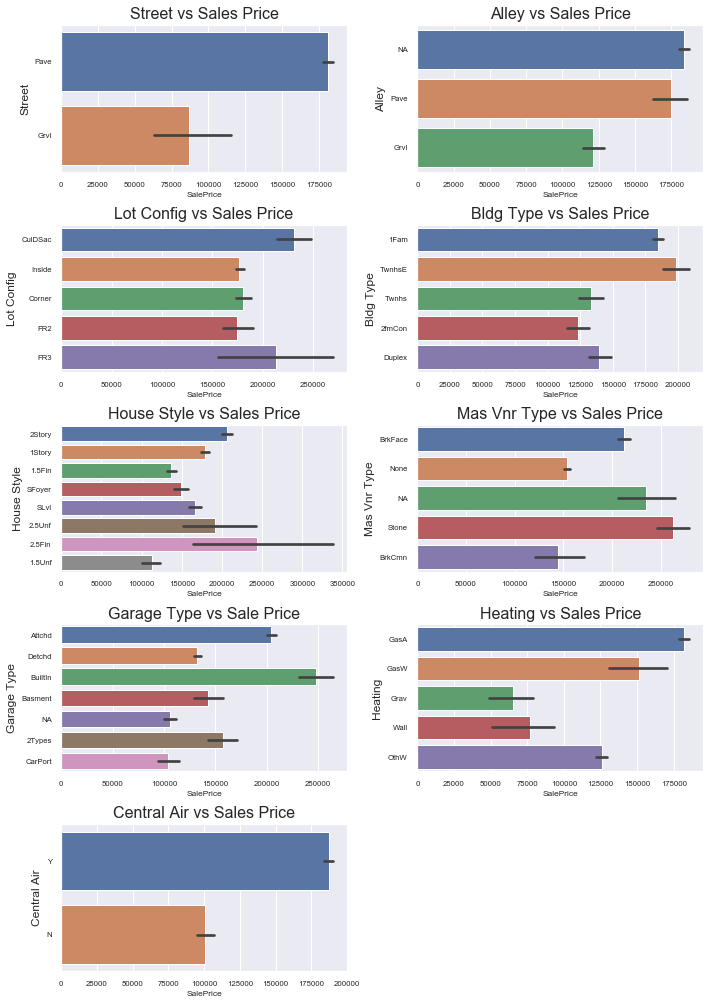

In [183]:
subplot_bars(df_train, 
             ["Street", "Alley", "Lot Config", "Bldg Type", "House Style","Mas Vnr Type", "Garage Type", "Heating", "Central Air"], 
              "SalePrice",
             ["Street vs Sales Price", "Alley vs Sales Price", "Lot Config vs Sales Price",
               "Bldg Type vs Sales Price","House Style vs Sales Price", "Mas Vnr Type vs Sales Price", 
              "Garage Type vs Sale Price", "Heating vs Sales Price", "Central Air vs Sales Price"],
             ["Street", "Alley", "Lot Config", "Bldg Type", "House Style","Mas Vnr Type", "Garage Type", "Heating", "Central Air"])

The bar charts showed the categorical features over Sales Price. 

For the features above, it would make sense to create dummies to represent categorial features as they are well distributed in Sales Price. However, there are some significant outliers being shown here.

For example:
Lot configuration FR3 (Frontage on 3 sides of property) has big outliers indicated in the barchart. The same applies for House Style 2.5 Fin (Two and one half sttory: 2nd level finished)

### Distribution plot 

Histogram

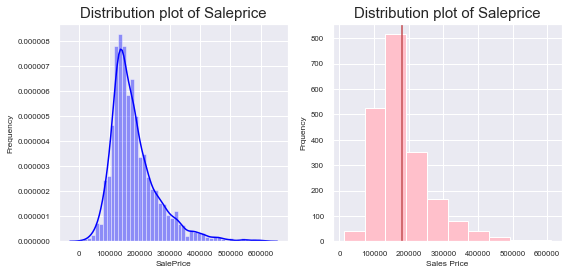

In [184]:
fig, ax = plt.subplots(ncols=2, figsize=(9,4)) 

#Seaborn plot
sns.distplot(df_train["SalePrice"], ax=ax[0], color="blue")
ax[0].set_title("Distribution plot of Saleprice",fontsize=15)
ax[0].set_ylabel("Frequency")

#Matplotlib plot
ax[1] = plt.hist(df_train["SalePrice"], color="pink")
plt.axvline(df_train["SalePrice"].mean(), color='r')
plt.xlabel("Sales Price")
plt.ylabel("Frquency");
plt.title("Distribution plot of Saleprice", fontsize=15);

Two histograms were plotted using different methods such as Matplotlib and Seaborn. In the left plot with seaborn, we can see that the distribution of Sales Price to be "almost" normally distributed. However, it is slightly right skewed. This is better visible in the histogram (right plot), where the red line in the plot is the mean of Sales Price. 

**By taking the log of Sales Price the distribution of Sales Price is normally distributed as in the plots below.**

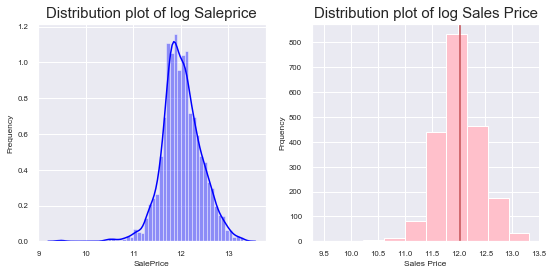

In [185]:
fig, ax = plt.subplots(ncols=2, figsize=(9,4)) 

#Seaborn plot
sns.distplot(np.log(df_train["SalePrice"]), ax=ax[0], color="blue")
ax[0].set_title("Distribution plot of log Saleprice",fontsize=15)
ax[0].set_ylabel("Frequency")

#Matplotlib plot
ax[1] = plt.hist(np.log(df_train["SalePrice"]), color="pink")
plt.axvline(np.log(df_train["SalePrice"]).mean(), color='r')
plt.xlabel("Sales Price")
plt.ylabel("Frquency");
plt.title("Distribution plot of log Sales Price", fontsize=15);

### Summary of Visualization

- Using the scatter plots the relationship between Sales price and size of the house was highly correlated. In order to make better use of the columns with square footage, it will be beneficial to add them together into one column.
- According to the distribution plot of Sales price, we should take the log of Sales price during modeling to create a normal distribution for Sales price. 
- For categorical feature, it will better if we create dummies to represents these values.
- Another useful feature would be calculating the age of the house when it was sold as see in the scatter plot of years built, remodeled and sold.

### Summary of Statistics 

We have observed high correlations between sales prices and many other variables such as size, quality, age and additional features like garage or basement. This relationship will be very useful for next part, which is modeling.
In conclusion, this data set will be able to solve our problem because logical conclusion can be drawn from it. 

# 4. Feature Engineering

Using obversation in the the visualization part new columns are going to be created with interaction for numerical data and dummies for categorial data.

### New columns

---
**New Porch column for both data sets**
- Porch square feet by adding `'Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'` together 

In [186]:
df_train["Total Porch SF"] = df_train["Wood Deck SF"] + df_train["Open Porch SF"] + df_train["Enclosed Porch"] + df_train['3Ssn Porch'] + df_train['Screen Porch']
df_test["Total Porch SF"] = df_test["Wood Deck SF"] + df_test["Open Porch SF"] + df_test["Enclosed Porch"] + df_test['3Ssn Porch'] + df_test['Screen Porch']

---
**New overall square feet column for both data sets**

- Overal square feet of the house by adding `'1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Total Bsmt SF'`

In [187]:
df_train["overall SF"] = df_train['1st Flr SF'] + df_train['2nd Flr SF'] + df_train['Gr Liv Area'] + df_train['Total Bsmt SF'] 
df_test["overall SF"] = df_test['1st Flr SF'] + df_test['2nd Flr SF'] + df_test['Gr Liv Area'] + df_test['Total Bsmt SF'] 

---
**New Basement Score column for both data sets**
- Interaction terms with `'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure'`, because they are all ordinal features about the Basement 

In [188]:
df_train["Bsmtscore"] = df_train["BsmtFin Type 1"] * df_train["BsmtFin Type 2"] * df_train["Bsmt Qual"] * df_train["Bsmt Cond"] + df_train["Bsmt Exposure"]
df_test["Bsmtscore"] = df_test["BsmtFin Type 1"] * df_test["BsmtFin Type 2"] * df_test["Bsmt Qual"] * df_test["Bsmt Cond"] * df_test["Bsmt Exposure"]

---
**New Garage Score column for both data sets**
-  Interaction terms with `'Garage Finish', 'Garage Qual' and 'Garage Cond'` , because they are all ordinal features about the Garage

In [189]:
df_train["Garagescore"] = df_train["Garage Finish"] * df_train["Garage Qual"] * df_train["Garage Cond"]
df_test["Garagescore"] = df_test["Garage Finish"] * df_test["Garage Qual"] * df_test["Garage Cond"]

**Making new column of the Age of the house**

- The year built is the same as the year remodeled if the house didn't have any new renovation or remodeling. See output below.

In [190]:
no_renovation = df_train["Year Built"] == df_train["Year Remod/Add"]

In [191]:
df_train[no_renovation][["Year Built", 'Year Remod/Add']].head(2)

,Year Built,Year Remod/Add
Id,,
145,1959,1959
1942,1952,1952


This means that if the house didn't get renovated, it still has the same age as it was built.

**Using this obversation, the age of the house can be calculated by substracting the date `year sold` and the `year remodeled`, in order to calculate the age of the house when it was sold.**

In [192]:
df_train["sold_age"] =  df_train["Yr Sold"] - df_train["Year Remod/Add"]
df_test["sold_age"] =  df_test["Yr Sold"] - df_test["Year Remod/Add"]

In [193]:
df_train["sold_age"].head()

Id
109     5
544    12
153     3
318     3
255    17
Name: sold_age, dtype: int64

In [194]:
df_test["sold_age"].head()

Id
2658    56
2718    29
2414     0
1989     1
625     46
Name: sold_age, dtype: int64

**Making new column with total rooms in the house**

In [195]:
df_train["room_total"] = df_train["TotRms AbvGrd"] +  df_train["Bsmt Full Bath"] + df_train["Bsmt Half Bath"] + df_train[ "Full Bath"] + df_train[ "Half Bath"]

In [196]:
df_test["room_total"] = df_test["TotRms AbvGrd"] + df_test["Bsmt Full Bath"] + df_test["Bsmt Half Bath"] + df_test[ "Full Bath"] + df_test[ "Half Bath"]

### One-hot Encoding

- Writing a function for converting nominal features into dummies

Assiging variable `dummy_cols` with all dtypes `'object'` 

In [197]:
list_of_values_to_dummy = df_train.select_dtypes(include='object').columns

In [198]:
df_train_dum = pd.get_dummies(df_train[list_of_values_to_dummy])
df_test_dum = pd.get_dummies(df_test[list_of_values_to_dummy])

for i in list(set(df_train_dum) - set(df_test_dum)):
    df_test_dum[i] = 0
for i in list(set(df_test_dum) - set(df_train_dum)):
    df_train_dum[i]=0
dum_dict = {}
for dum in list_of_values_to_dummy:
    dum_dict[dum] = []
    for col in df_train_dum.columns:
        if dum in col:
            dum_dict[dum].append(col)
for key in dum_dict:
    df_train_dum.drop(columns = dum_dict[key][0], inplace = True)
    df_test_dum.drop(columns = dum_dict[key][0], inplace = True)
df_train = df_train.join(df_train_dum)
df_train.drop(columns=list_of_values_to_dummy, inplace=True)
df_test = df_test.join(df_test_dum)
df_test.drop(columns=list_of_values_to_dummy, inplace=True)

# 5. Modeling

As previously shown in data analysis, it makes sense to use linear regresion for modeling as many features in this data set has a high linear correlation with sales price. In order to predict sales price, this relationship can be further explored using linear regression, ridge regression and lasso regresion.

### Linear Regression
---

### Preparing data

**Checking for NaN's or missing columns before modeling**

In [199]:
print(f"NaN's in train: {df_train.columns[df_train.isna().any()].tolist()}")
print(f"NaN's in test: {df_test.columns[df_test.isna().any()].tolist()}")
print("----")
print(f"Missing columns in test data are:\n{[column for column in df_train.columns if column not in df_test.columns]}")

NaN's in train: []
NaN's in test: []
----
Missing columns in test data are:
['SalePrice']


**Features for modeling**

Features with correlation above 0.1 and features with negative correlation higher than -0.2 were picked for modeling

In [200]:
feature = df_train.corr()[["SalePrice"]]
feature = feature[(feature["SalePrice"] >= 0.2) | (feature["SalePrice"] <= - 0.2)].index
feature = feature.drop(["SalePrice"])

Assigning features to variables

In [201]:
X = df_train[feature]
y = df_train["SalePrice"]

### Train/test split & Scaling
---

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 

**Establish a Baseline Model that predicts y_train_mean**

In [203]:
# Import Package
from sklearn.dummy import DummyRegressor

# Instantiate: creates a skeleton of a model that will always predict the mean of the target
base_mean = DummyRegressor(strategy='mean')

# Fit the (terrible) model
base_mean = base_mean.fit(X_train, y_train)

# Get predictions!
y_hat_base_train = base_mean.predict(X_train)
y_hat_base_test = base_mean.predict(X_test)

# Evaluate: let's use RMSE
print(f'Our train RMSE scorefor our Baseline Model is: {np.sqrt(mean_squared_error(y_train, y_hat_base_train))}')
print(f'Our test RMSE score for our Baseline Model is: {np.sqrt(mean_squared_error(y_test, y_hat_base_test))}')

Our train RMSE scorefor our Baseline Model is: 78509.36065918634
Our test RMSE score for our Baseline Model is: 79081.18267217981


> Taking the log of Sales Price as shown previously by distribution plot in order to have a normal distribution from Sales Price

In [204]:
y_test_log = y_test.map(np.log)
y_train_log = y_train.map(np.log)

In [205]:
ss = StandardScaler()
ss.fit(X_train) # learns the x_mean, x_std for each column
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Instantiate our model

In [206]:
model = LinearRegression()

#### Cross validation
Baseline for test score model 

In [207]:
cross_val_score(model, X_train_sc, y_train_log, cv = 5).mean()

0.8856694632915071

### Fitting and first look into evaluation

In [208]:
model.fit(X_train_sc, y_train_log);

In [209]:
model.intercept_

12.020721819157384

In [210]:
model.coef_;

In [211]:
print(f" Training R^2 Score is: {model.score(X_train_sc, y_train_log)}")
print(f" Testing R^2 Score is: {model.score(X_test_sc,y_test_log)}")

 Training R^2 Score is: 0.9013111164562753
 Testing R^2 Score is: 0.9026092946203574


### Predictions

In [212]:
y_hat_test = model.predict(X_test_sc)
y_hat_train = model.predict(X_train_sc)

**Residuals**

In [213]:
residuals = y_test_log - y_hat_test
y_hat_test_in_unit = np.exp(y_hat_test)
y_hat_train_in_unit = np.exp(y_hat_train)

**Residuals Analysis**

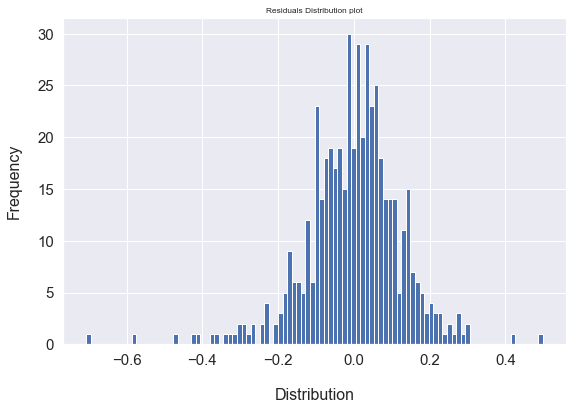

In [214]:
residuals.hist(bins=100, figsize=(9,6))
plt.title("Residuals Distribution plot")
plt.xlabel("Distribution", fontsize=16, labelpad=20)
plt.ylabel("Frequency", fontsize=16, labelpad=15)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15);

**Heteroskedasticity**

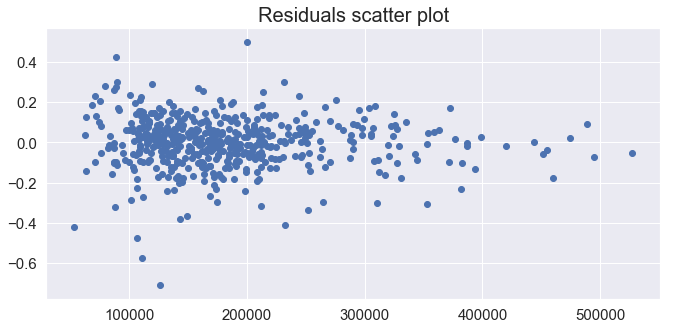

In [215]:
plt.figure(figsize=(11,5))
plt.scatter(y_hat_test_in_unit, residuals)
plt.title("Residuals scatter plot", fontsize= 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15);

**Evaluating model**

In [216]:
print(f"Our prediction testing R^2 is:   {r2_score(y_test,y_hat_test_in_unit)}")
print(f"Our prediction training R^2 is: {r2_score(y_train,y_hat_train_in_unit)}")
print("-----")
print(f" Our train RMSE score for our Model is = {np.sqrt(mean_squared_error(y_train, y_hat_train_in_unit))}")
print(f" Our test RMSE score for our Model is =  {np.sqrt(mean_squared_error(y_test, y_hat_test_in_unit))}")

Our prediction testing R^2 is:   0.9186931293279637
Our prediction training R^2 is: 0.9266230978314727
-----
 Our train RMSE score for our Model is = 21266.750062871623
 Our test RMSE score for our Model is =  22543.901823024393


## Summary of Linear Regression
---

|Model|Metrics|Data set|Score|Evaluation|
|---|---|---|---|---|
|Baseline Dummy Regression|RMSE|Testing|78509| High bias, low variance
|Baseline Dummy Regression|RMSE|Training|79081|
|Prediction Linear Regression|RMSE|Testing|21266| Low bias and low variance|
|Prediction Linear Regression|RMSE|Training|22543|
|Baseline Linear Regression|$R^2$|Training|0.886|
|Prediction Linear Regression|$R^2$|Training| 0.927|Low bias and low variance|
|Prediction Linear Regression|$R^2$|Testing|0.912|

<br>
In the baseline Dummy regression model, our RMSE shows high bias and low variance. This was expected as the dummy regression model uses the mean of sales price to predict. This is highly biased as not all sales price are priced with the mean.   
<br>

Predictions Linear Regression,on the other hand, RMSE has low bias and low variance with the error of 20,000 dollar margin. $R^2$ has low bias and low variance in our predictions meaning that around 91 percent of the variance in the testing data is being represented in our model. It is a good model, because according the error and $R^2$ evaluation, our model is not over and under fitted. 
<br>

Another way to evaluate our model is to look at the plots above. 
Residuals Distribution plot and Heteroskedasticity plot shows the distribution of our errors. Because our errors are normally distributed and equally scattered (heteroskedastic), we can assume that our model is well balanced between bias and variance.

### Ridge Regression
---

**Instantiate and Fitting the model**

In [217]:
ridge = Ridge(alpha=10)
ols = ridge.fit(X_train_sc, y_train_log);

**Setting up a list of ridge $\alpha$ to check**

In [218]:
r_alphas = np.logspace(0, 5, 100)

**Cross-validate over the list of ridge $\alpha$**

In [219]:
ridge_cv = RidgeCV(alphas=r_alphas, scoring="r2", cv= 5)

**Fit model using best ridge alpha**

In [220]:
ridge_cv.fit(X_train_sc, y_train_log);
ridge_cv.alpha_

65.79332246575679

**Predictions**

In [221]:
y_hat_train = ridge_cv.predict(X_train_sc)
y_hat_test = ridge_cv.predict(X_test_sc)

#converting back to it's initial value by taking the exp.
y_hat_train_in_unit = np.exp(y_hat_train)
y_hat_test_in_unit = np.exp(y_hat_test)

**Evaluation**

In [222]:
print(f'Our train RMSE score for our Ridge model is: {np.sqrt(mean_squared_error(y_train, y_hat_train_in_unit))}')
print(f'Our test RMSE score for our Ridge model is: {np.sqrt(mean_squared_error(y_test, y_hat_test_in_unit))}')
print("-----")
print(f"Our prediction training R^2 in our Ridge modelis:  {r2_score(y_train,y_hat_train_in_unit)}")
print(f"Our prediction testing R^2 in our Ridge model is:   {r2_score(y_test,y_hat_test_in_unit)}")

Our train RMSE score for our Ridge model is: 21082.498636658842
Our test RMSE score for our Ridge model is: 21872.990976639037
-----
Our prediction training R^2 in our Ridge modelis:  0.9278890394767194
Our prediction testing R^2 in our Ridge model is:   0.9234605345130151


> Summary of evaluation of Ridge and Lasso Regression will be summerized after the section below.

### Lasso Regression
----

**Setting up a list of lasso $\alpha$ to check**

In [223]:
l_alphas = np.logspace(-3, 5, 100)

**Cross-validate over the list of ridge $\alpha$**

In [224]:
lasso = LassoCV(alphas=l_alphas, cv= 5, max_iter=5000)

**Fit model using best ridge alpha**

In [225]:
lasso.fit(X_train_sc, y_train_log);

**Predictions**

In [226]:
y_hat_train = lasso.predict(X_train_sc)
y_hat_test = lasso.predict(X_test_sc)

#converting back to it's initial value by taking the exp.
y_hat_train_in_unit = np.exp(y_hat_train)
y_hat_test_in_unit = np.exp(y_hat_test)

**Evaluating the model**

In [228]:
print(f'Our train RMSE score for our Lasso model is: {np.sqrt(mean_squared_error(y_train, y_hat_train_in_unit))}')
print(f'Our test RMSE score for our Lasso model is: {np.sqrt(mean_squared_error(y_test, y_hat_test_in_unit))}')
print("-----")
print(f"Our prediction training R^2 in our Lasso modelis:  {r2_score(y_train,y_hat_train_in_unit)}")
print(f"Our prediction testing R^2 in our Lasso model is:   {r2_score(y_test,y_hat_test_in_unit)}")

Our train RMSE score for our Lasso model is: 21552.314181640355
Our test RMSE score for our Lasso model is: 21907.372870848005
-----
Our prediction training R^2 in our Lasso modelis:  0.9246392976392871
Our prediction testing R^2 in our Lasso model is:   0.9232197224470111


In [230]:
df_coef = pd.DataFrame(lasso.coef_)
df_coef['name'] = X.columns
df_coef['abs_coef'] = np.abs(df_coef[0])
df_coef.sort_values(by = 'abs_coef', ascending = False).head(5)

,0,name,abs_coef
35,0.120749,overall SF,0.120749
2,0.108025,Overall Qual,0.108025
38,-0.034093,sold_age,0.034093
11,0.031867,BsmtFin SF 1,0.031867
31,0.025624,Paved Drive,0.025624


## Summary of Ridge and Lasso Regression
---

|Model|Metrics|Data set|Score|Evaluation
|---|---|---|---|---|
|Linear Regression|RMSE|Testing|21266| 
|Linear Regression|RMSE|Training|22543|
|Ridge Regression|RMSE|Testing|21082| 
|Ridge Regression|RMSE|Training|22872|
|Lasso Regression|RMSE|Testing|21522| Best RMSE score|
|Lasso Regression|RMSE|Training|21907|
|Linear Regression|$R^2$|Training| 0.927|
|Linear Regression|$R^2$|Testing|0.912|
|Ridge Regression|$R^2$|Training|0.927|
|Ridge Regression|$R^2$|Testing|0.923|
|Lasso Regression|$R^2$|Training|0.924|Best $R^2$ score|
|Lasso Regression|$R^2$|Testing|0.923|


All three models resulted in very similar scores. However, by comparing all three models **the lasso regression** resulted in the best score of error as well as in $R^2$ score. 
The model was able to beat the baseline score and was not overfitted or underfitted. The lasso regression also elimates noise in terms of not using features that don't affect the sale price. Therefore, it is the most reliable model out of these three.


# 6. Conclusion and Recommendations

By using different models of regression, we were able to predict sales price within a margin of \$20,000.   
The top 5 features that contributed the most to the predictions are the followings: 
- Size of the house
- Overall quality of the house
- Age of the house
- Finished basement
- Paved driveway

Based on this model, we can assume that these features are the driving factors if it comes to increasing your home value. We can make recommendations to our clients on things they can improve in their homes before selling it. For instance, if they were to have an unfinished basement, we can recommend them to renovate and finish the basement, if they desire to increase their home value. The model can be very useful in the future if we can isolate certain trends or overall quality finishes that improve homes more than others. However, this needs further research with more recent data. This model still needs improvement, because a margin of \\$20,000 in error is still relatively high. This means a house can be under-valued by \\\$20,000 dollar or over-valued by \\\$20,000. The next step would be making a better model with more data to reduce the margin of error.